In [ ]:
import numpy as np
import pandas as pd

In [ ]:
match = pd.read_csv('/content/drive/MyDrive/matches.csv')
delivery = pd.read_csv('/content/drive/MyDrive/deliveries.csv')

In [ ]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
match.shape

(1095, 20)

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [ ]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [ ]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [ ]:
# match_df['team1'].unique()
team_mapping = {
    "Royal Challengers Bangalore": "Royal Challengers Bengaluru",
    "Delhi Daredevils": "Delhi Capitals",
    "Kings XI Punjab": "Punjab Kings"
}

# Updating the column
match_df['team1'] = match_df['team1'].replace(team_mapping)
match_df['toss_winner'] = match_df['toss_winner'].replace(team_mapping)
match_df['winner'] = match_df['winner'].replace(team_mapping)


match_df['team2'] = match_df['team2'].replace(team_mapping)
match_df



,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangaluru',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Gujarat Titans',
    'Lucknow Super Giants'
]

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(741, 22)

In [ ]:
# match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')

In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,NaN,0,NaN,NaN,NaN
125,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN
126,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN
127,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,4,K Goel,JDP Oram,JR Hopes,1,0,1,NaN,0,NaN,NaN,NaN
128,335983,Chandigarh,Chennai Super Kings,240,2,Kings XI Punjab,Chennai Super Kings,0,5,JR Hopes,JDP Oram,K Goel,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177589,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
177590,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
177591,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
177592,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [ ]:
remove = ['extras_type', 'dismissal_kind', 'fielder']

# Use .drop() to remove columns
delivery_df = delivery_df.drop(columns=remove, errors='ignore')

# Display updated DataFrame
print(delivery_df.head())


     match_id        city               winner  total_runs_x  inning  \
124    335983  Chandigarh  Chennai Super Kings           240       2   
125    335983  Chandigarh  Chennai Super Kings           240       2   
126    335983  Chandigarh  Chennai Super Kings           240       2   
127    335983  Chandigarh  Chennai Super Kings           240       2   
128    335983  Chandigarh  Chennai Super Kings           240       2   

        batting_team         bowling_team  over  ball    batter    bowler  \
124  Kings XI Punjab  Chennai Super Kings     0     1    K Goel  JDP Oram   
125  Kings XI Punjab  Chennai Super Kings     0     2    K Goel  JDP Oram   
126  Kings XI Punjab  Chennai Super Kings     0     3    K Goel  JDP Oram   
127  Kings XI Punjab  Chennai Super Kings     0     4    K Goel  JDP Oram   
128  Kings XI Punjab  Chennai Super Kings     0     5  JR Hopes  JDP Oram   

    non_striker  batsman_runs  extra_runs  total_runs_y  is_wicket  \
124    JR Hopes             4     

In [ ]:
team_mapping = {
    "Royal Challengers Bangalore": "Royal Challengers Bengaluru",
    "Delhi Daredevils": "Delhi Capitals",
    "Kings XI Punjab": "Punjab Kings"
}

# Updating the column
delivery_df['batting_team'] = delivery_df['batting_team'].replace(team_mapping)
delivery_df['bowling_team'] = delivery_df['bowling_team'].replace(team_mapping)
delivery_df['winner'] = delivery_df['winner'].replace(team_mapping)



delivery_df


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,is_wicket,player_dismissed
124,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,0,NaN
125,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,0,NaN
126,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,0,NaN
127,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,4,K Goel,JDP Oram,JR Hopes,1,0,1,0,NaN
128,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,5,JR Hopes,JDP Oram,K Goel,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177589,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,0,NaN
177590,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,0,NaN
177591,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,0,NaN
177592,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,0,NaN


In [ ]:
delivery_df = delivery_df[delivery_df['batting_team'].isin(teams)]
delivery_df = delivery_df[delivery_df['bowling_team'].isin(teams)]

In [ ]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,is_wicket,player_dismissed,current_score,runs_left,balls_left
124,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,0,NaN,4,236,125
125,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,0,NaN,4,236,124
126,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,0,NaN,4,236,123
127,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,4,K Goel,JDP Oram,JR Hopes,1,0,1,0,NaN,5,235,122
128,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,5,JR Hopes,JDP Oram,K Goel,0,0,0,0,NaN,5,235,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177589,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,0,NaN,110,3,67
177590,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,0,NaN,111,2,66
177591,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,0,NaN,112,1,65
177592,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,0,NaN,113,0,64


In [ ]:
# Convert 'player_dismissed' column: Fill NaN with "0", then convert to "1" if a player was dismissed
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: "1" if x != "0" else "0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(int)  # Convert to integer

# Compute cumulative sum of wickets per match
delivery_df['wickets'] = 10 - delivery_df.groupby('match_id')['player_dismissed'].cumsum()

# Display the first few rows
print(delivery_df.head())


     match_id        city               winner  total_runs_x  inning  \
124    335983  Chandigarh  Chennai Super Kings           240       2   
125    335983  Chandigarh  Chennai Super Kings           240       2   
126    335983  Chandigarh  Chennai Super Kings           240       2   
127    335983  Chandigarh  Chennai Super Kings           240       2   
128    335983  Chandigarh  Chennai Super Kings           240       2   

     batting_team         bowling_team  over  ball    batter  ... non_striker  \
124  Punjab Kings  Chennai Super Kings     0     1    K Goel  ...    JR Hopes   
125  Punjab Kings  Chennai Super Kings     0     2    K Goel  ...    JR Hopes   
126  Punjab Kings  Chennai Super Kings     0     3    K Goel  ...    JR Hopes   
127  Punjab Kings  Chennai Super Kings     0     4    K Goel  ...    JR Hopes   
128  Punjab Kings  Chennai Super Kings     0     5  JR Hopes  ...      K Goel   

    batsman_runs  extra_runs  total_runs_y  is_wicket  player_dismissed  \
124  

In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,non_striker,batsman_runs,extra_runs,total_runs_y,is_wicket,player_dismissed,current_score,runs_left,balls_left,wickets
124,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,1,K Goel,...,JR Hopes,4,0,4,0,0,4,236,125,10
125,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,2,K Goel,...,JR Hopes,0,0,0,0,0,4,236,124,10
126,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,3,K Goel,...,JR Hopes,0,0,0,0,0,4,236,123,10
127,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,4,K Goel,...,JR Hopes,1,0,1,0,0,5,235,122,10
128,335983,Chandigarh,Chennai Super Kings,240,2,Punjab Kings,Chennai Super Kings,0,5,JR Hopes,...,K Goel,0,0,0,0,0,5,235,121,10


In [ ]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(140 - delivery_df['balls_left'])

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [ ]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
123208,Mumbai Indians,Delhi Capitals,NaN,79,95,10,110,4.133333,4.989474,1


In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df = final_df[final_df['balls_left'] != 0]

In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
8654,Kolkata Knight Riders,Punjab Kings,Kolkata,164,120,10,174,3.000000,8.200000
155600,Mumbai Indians,Punjab Kings,Mumbai,180,101,9,214,5.230769,10.693069
134058,Mumbai Indians,Rajasthan Royals,Sharjah,67,107,10,90,4.181818,3.757009
128810,Chennai Super Kings,Sunrisers Hyderabad,Delhi,20,29,7,171,8.162162,4.137931
163818,Mumbai Indians,Gujarat Titans,Ahmedabad,157,87,7,233,8.603774,10.827586
...,...,...,...,...,...,...,...,...,...
178,Punjab Kings,Chennai Super Kings,Chandigarh,145,73,9,240,8.507463,11.917808
91672,Mumbai Indians,Kolkata Knight Riders,Bangalore,61,81,7,107,4.677966,4.518519
53467,Mumbai Indians,Kolkata Knight Riders,Kolkata,48,43,7,159,6.865979,6.697674
98445,Punjab Kings,Rajasthan Royals,Indore,125,101,9,152,4.153846,7.425743


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define ColumnTransformer with OneHotEncoder
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

# Now you can fit and transform the data with this transformer


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
X_train.fillna(0, inplace=True)
X_test.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000,14884.000000
mean,93.223058,68.459755,7.502486,168.791588,5.686004,8.531519
std,50.945316,33.657029,2.166194,30.904582,2.103818,4.314947
min,-6.000000,4.000000,0.000000,67.000000,0.000000,-6.000000
25%,53.000000,40.000000,6.000000,148.000000,4.560000,6.439024
50%,92.000000,69.000000,8.000000,168.000000,6.000000,8.129032
75%,131.000000,98.000000,9.000000,188.000000,7.090909,9.931034
max,273.000000,125.000000,10.000000,277.000000,13.852941,83.142857


In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8174549852190272

In [ ]:
pipe.predict_proba(X_test)[10]

array([0.14603842, 0.85396158])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [ ]:
delivery_df[delivery_df["match_id"]==1426312]

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,is_wicket,player_dismissed,current_score,runs_left,balls_left,wickets,crr,rrr,result
177527,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,0,1,Rahmanullah Gurbaz,...,0,0,0,0,113,125,10,0.000000,5.424000,1
177528,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,0,2,Rahmanullah Gurbaz,...,4,0,0,4,109,124,10,1.500000,5.274194,1
177529,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,0,3,Rahmanullah Gurbaz,...,0,0,0,4,109,123,10,1.411765,5.317073,1
177530,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,0,4,Rahmanullah Gurbaz,...,1,0,0,5,108,122,10,1.666667,5.311475,1
177531,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,0,5,Rahmanullah Gurbaz,...,0,0,0,5,108,121,10,1.578947,5.355372,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177589,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,0,0,110,3,67,8,9.041096,0.268657,1
177590,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,0,0,111,2,66,8,9.000000,0.181818,1
177591,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,0,0,112,1,65,8,8.960000,0.092308,1
177592,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,0,0,113,0,64,8,8.921053,0.000000,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
temp_df,target = match_progression(delivery_df,1426312,pipe)
temp_df

Target- 113


,end_of_over,runs_after_over,wickets_in_over,lose,win
177532,1,5,0,17.9,82.1
177539,2,12,1,17.6,82.4
177546,3,20,0,6.9,93.1
177552,4,7,0,6.0,94.0
177560,5,8,0,4.8,95.2
177566,6,20,0,1.7,98.3
177572,7,12,0,1.0,99.0
177578,8,9,0,0.7,99.3
177584,9,13,1,0.6,99.4
177590,10,5,0,0.5,99.5


Text(0.5, 1.0, 'Target-113')

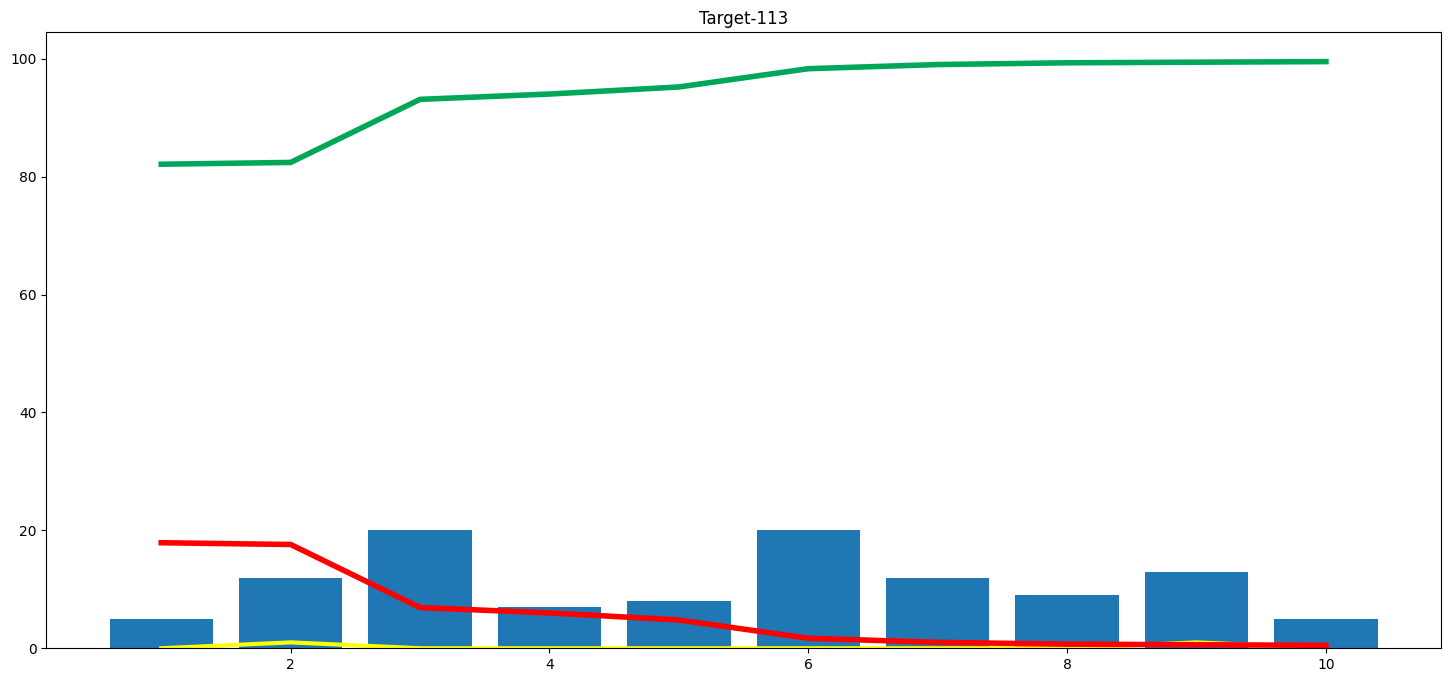

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangaluru',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Gujarat Titans',
 'Lucknow Super Giants']

In [ ]:
delivery_df[delivery_df['batting_team'] == 'Gujarat Titans']


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,is_wicket,player_dismissed,current_score,runs_left,balls_left,wickets,crr,rrr,result
136124,1304050,Mumbai,Gujarat Titans,158,2,Gujarat Titans,Lucknow Super Giants,0,1,Shubman Gill,...,4,0,0,4,154,125,10,1.600000,7.392000,1
136125,1304050,Mumbai,Gujarat Titans,158,2,Gujarat Titans,Lucknow Super Giants,0,2,Shubman Gill,...,0,0,0,4,154,124,10,1.500000,7.451613,1
136126,1304050,Mumbai,Gujarat Titans,158,2,Gujarat Titans,Lucknow Super Giants,0,3,Shubman Gill,...,0,1,1,4,154,123,9,1.411765,7.512195,1
136127,1304050,Mumbai,Gujarat Titans,158,2,Gujarat Titans,Lucknow Super Giants,0,4,V Shankar,...,1,0,0,5,153,122,9,1.666667,7.524590,1
136128,1304050,Mumbai,Gujarat Titans,158,2,Gujarat Titans,Lucknow Super Giants,0,5,V Shankar,...,0,0,0,5,153,121,9,1.578947,7.586777,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171897,1426278,Delhi,Delhi Capitals,224,2,Gujarat Titans,Delhi Capitals,19,2,Rashid Khan,...,4,0,0,214,10,10,2,9.876923,6.000000,0
171898,1426278,Delhi,Delhi Capitals,224,2,Gujarat Titans,Delhi Capitals,19,3,Rashid Khan,...,0,0,0,214,10,9,2,9.801527,6.666667,0
171899,1426278,Delhi,Delhi Capitals,224,2,Gujarat Titans,Delhi Capitals,19,4,Rashid Khan,...,0,0,0,214,10,8,2,9.727273,7.500000,0
171900,1426278,Delhi,Delhi Capitals,224,2,Gujarat Titans,Delhi Capitals,19,5,Rashid Khan,...,6,0,0,220,4,7,2,9.924812,3.428571,0


In [ ]:
delivery_df['city'].unique()

array(['Chandigarh', 'Delhi', 'Jaipur', 'Chennai', 'Kolkata', 'Mumbai',
       'Cape Town', 'Durban', 'Port Elizabeth', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Dharamsala', 'Pune', 'Bangalore', 'Hyderabad',
       'Raipur', 'Abu Dhabi', nan, 'Ranchi', 'Cuttack', 'Visakhapatnam',
       'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati',
       'Mohali'], dtype=object)

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [ ]:
match_df.to_csv("MatchDF.csv")
delivery_df.to_csv("DeliveryDF.csv")
final_df.to_csv("finalDF.csv")

In [ ]:
X_test